# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '230905'
experiment_path = glue("{output_path}/{experiment}")
print(experiment_path)

[1] "/sc-projects/sc-proj-ukb-cvd"
/sc-projects/sc-proj-ukb-cvd/results/projects/22_retina_phewas/data/230905


In [3]:
today = '230905'

In [4]:
base_size = 8
title_size = 10
facet_size = 10
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [5]:
colors_dict = read_json("colors.json")
color_map <- c(
    "Age+Sex" = colors_dict$pastel$red$mid,
    "Retina" = colors_dict$pastel$red$mid,
    "Age+Sex+Retina" = colors_dict$pastel$red$mid,
    'MultiTaskSurvivalTraining_None_InceptionResnetV2+MLP_Identity' = colors_dict$pastel$red$mid
    #"Identity(AgeSex)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(Records)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid
)

In [6]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)

In [7]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
#endpoint_order

In [8]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401", #Hypertension"
    "phecode_404", # Ischemic heart disease
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure
    
    "phecode_059-1", # COVID 19
    
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
    
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    
    #"phecode_374-3", # Retinal vascular changes and occlusions
###  "phecode_374-42", # Diabetic retinopathy ### OBSOLETE W/O COVID DATA :( 
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    #"phecode_388" # Blindness and low vision 
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_440-3", # Pulmonary embolism
    
    "phecode_583", # Chronic kidney disease
    "phecode_542", # Chronic liver disease and sequelae
    
    "OMOP_4306655" # All-Cause Death
    
    #"phecode_468-1",	#Viral pneumonia
    
    #"phecode_460-2",	#Acute lower respiratory infection
    #"phecode_665", # Psoriasis
    #"phecode_121", # Leukemia
    #"phecode_705-1" # Rheumatoid arthritis

)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [9]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"COPD",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
               phecode_string == "Malignant neoplasm of the thoracic and respiratory organs"~"Thoracic and respiratory cancer",
               phecode_string == "Malignant neoplasm of the digestive organs"~"GI cancer",
               phecode_string == "Malignant neoplasm of the skin"~"Skin cancer",
               phecode_string == "Dementias and cerebral degeneration"~"Dementias",
               phecode_string == "Chronic liver disease and sequelae"~"Chronic liver disease",
               
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [10]:
endpoints_cardio = c(
    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_424', #  "Heart failure", # intervention
    'OMOP_4306655', #  "All-Cause Death", # intervention
    'phecode_420', #  "Cardiac arrest", # intervention
    'phecode_059-1' # COVID
)

## Load data

# Load Benchmarks

In [11]:
name = "hrs_endpoints"
hrs_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather"), col_select=c("endpoint", "score", "partition", "hrs_ret", "hrs_ret_age", "hrs_ret_sex")) %>% left_join(endpoint_defs) 

Joining, by = "endpoint"



In [12]:
hrs_endpoints

endpoint,score,partition,hrs_ret,hrs_ret_age,hrs_ret_sex,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf,name
<glue>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
OMOP_4306655,ASCVD+Retina,4,2.689602,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,ASCVD+Retina,5,2.704538,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,ASCVD+Retina,7,2.141984,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,ASCVD+Retina,9,2.777396,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,ASCVD+Retina,10,2.966433,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,ASCVD+Retina,20,2.525310,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,4,3.027818,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,5,3.005362,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death
OMOP_4306655,Age+Sex+Retina,7,2.459305,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA,All-Cause Death


In [13]:
hrs = hrs_endpoints %>% 
    group_by(endpoint, score, phecode_string, phecode_category) %>% 
    #filter(score %in% c("Retina", "Age+Sex+Retina", "Age+Sex+Retina+I(Age*ret)")) %>%
    #mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    #mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    select(endpoint, score, hrs_ret, hrs_ret_age, hrs_ret_sex, phecode_string, phecode_category) %>%
    ungroup()
hrs

endpoint,score,hrs_ret,hrs_ret_age,hrs_ret_sex,phecode_string,phecode_category
<glue>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
OMOP_4306655,ASCVD+Retina,2.689602,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.704538,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.141984,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.777396,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.966433,NA,NA,All-Cause Death,Death
OMOP_4306655,ASCVD+Retina,2.525310,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.027818,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,3.005362,NA,NA,All-Cause Death,Death
OMOP_4306655,Age+Sex+Retina,2.459305,NA,NA,All-Cause Death,Death


In [14]:
unique(hrs$score)

[1] "ASCVD+Retina"   "Age+Sex+Retina" "QRISK3+Retina"  "Retina"        
[5] "SCORE2+Retina"

In [15]:
purrr::map_dfr(integer(100), ~ hrs %>% group_by(endpoint, score) %>% sample_frac(1, replace=TRUE), .id="i") -> temp_hrs

In [16]:
library(ggdist)

Warning message:
“package ‘ggdist’ was built under R version 4.0.5”


In [17]:
temp_hrs_ret = temp_hrs %>% group_by(endpoint, score, phecode_string, phecode_category) %>% median_qi(hrs_ret, hrs_ret_age, hrs_ret_sex, na.rm=TRUE)

In [18]:
temp_hrs_linear = temp_hrs %>% ungroup() %>%
    filter(score %in% c("Retina",
                        "Age+Sex+Retina",
                        "SCORE2+Retina",
                        "ASCVD+Retina",
                        "QRISK3+Retina"
                       )) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>% 
    median_qi(`hrs_ret`, na.rm=TRUE) %>% rename(hr = `hrs_ret`) %>%
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_Retina = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, score, phecode_string, phecode_category, HR_Retina) %>%
    pivot_wider(names_from="score", values_from="HR_Retina") %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "Retina", 'Age+Sex+Retina',
                     "SCORE2+Retina", "ASCVD+Retina","QRISK3+Retina"
                   ))) %>% 
    #mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(endpoint) %>%
    #mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup()
    
temp_hrs_linear

phecode_category,endpoint,phecode_string,Retina,Age+Sex+Retina,SCORE2+Retina,ASCVD+Retina,QRISK3+Retina
<chr>,<glue>,<chr>,<glue>,<glue>,<glue>,<glue>,<glue>
Death,OMOP_4306655,All-Cause Death,"4.33 (3.87, 4.37)","3.01 (2.46, 3.33)","2.7 (2.18, 2.95)","2.7 (2.14, 2.97)","2.56 (2.05, 2.87)"
ID,phecode_002,Staphylococcus,"4.11 (3.84, 4.63)","4.83 (3.99, 5.36)","4.28 (3.75, 4.83)","3.92 (3.62, 4.41)","3.62 (3.24, 4.05)"
ID,phecode_002-1,Staphylococcus aureus,"4.11 (3.66, 4.56)","5.12 (3.86, 5.81)","4.67 (3.65, 5.26)","4.4 (3.85, 4.87)","3.95 (3.52, 4.26)"
ID,phecode_003,Escherichia coli,"4.37 (3.84, 4.44)","4.82 (3.8, 5.14)","4.48 (3.46, 4.77)","4.02 (3.14, 4.57)","3.45 (2.75, 4)"
ID,phecode_004,Streptococcus,"4.52 (3.65, 5.26)","5.31 (4.18, 6.24)","4.76 (3.79, 5.77)","4.71 (3.5, 5.62)","4.67 (0.97, 4.77)"
ID,phecode_009,Pseudomonas,"4.58 (3.62, 5.22)","4.38 (2.26, 5.64)","4.02 (1.94, 5.14)","4.15 (1.87, 5.02)","3.41 (1.63, 4.23)"
ID,phecode_011,Klebsiella,"4.76 (3.52, 6.17)","5.15 (2.63, 6.59)","4.74 (2.27, 5.9)","4.48 (2.18, 6.02)","3.63 (1.81, 5.11)"
ID,phecode_015,Clostridium,"4.83 (4.41, 5.55)","5.09 (4.8, 6.49)","4.8 (4.44, 6.12)","4.82 (4.13, 6.28)","4.68 (3.8, 5.64)"
ID,phecode_015-2,Clostridium difficile,"4.75 (4.4, 5.23)","5.31 (4.76, 6.11)","5.03 (4.46, 5.76)","4.87 (4.12, 5.99)","4.72 (3.8, 5.28)"


In [19]:
# new, after bugfix
temp_hrs_linear %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category)

endpoint,phecode_string,Retina,Age+Sex+Retina,SCORE2+Retina,ASCVD+Retina,QRISK3+Retina
<glue>,<chr>,<glue>,<glue>,<glue>,<glue>,<glue>
OMOP_4306655,All-Cause Death,"4.33 (3.87, 4.37)","3.01 (2.46, 3.33)","2.7 (2.18, 2.95)","2.7 (2.14, 2.97)","2.56 (2.05, 2.87)"
phecode_059-1,COVID-19*,"4.85 (4.29, 5.15)","5.31 (4.22, 6.02)","4.84 (3.83, 5.25)","4.07 (3.58, 4.62)","3.59 (3.19, 4.26)"
phecode_101,Malignant neoplasm of the digestive organs,"3.55 (3.42, 3.88)","2.34 (1.79, 2.52)","2.19 (1.67, 2.35)","2.17 (1.65, 2.36)","2.11 (1.6, 2.33)"
phecode_102,Malignant neoplasm of the thoracic and respiratory organs,"4.46 (4.19, 4.83)","3.71 (3.21, 4.32)","3.04 (2.43, 3.25)","3.02 (2.41, 3.19)","2.97 (2.49, 3.28)"
phecode_103,Malignant neoplasm of the skin,"3.42 (3.01, 4.51)","1.72 (1.19, 2.19)","1.74 (1.22, 2.21)","1.32 (1.06, 1.55)","1.28 (1.09, 1.56)"
phecode_164,Anemia,"4.21 (3.98, 4.64)","4.15 (3.66, 4.94)","3.72 (3.25, 4.43)","3.14 (2.64, 3.63)","3.08 (2.45, 3.38)"
phecode_202,Diabetes mellitus,"3.68 (3.53, 4.15)","4.11 (3.96, 4.83)","3.48 (3.31, 3.99)","3.32 (2.95, 3.41)","2.64 (2.38, 2.66)"
phecode_286-2,Major depressive disorder,"6.29 (4.33, 6.37)","13.39 (7.11, 24)","11.04 (6.27, 16.75)","9.21 (5.82, 16.84)","7.44 (4.7, 10.28)"
phecode_324-11,Parkinson's disease (Primary),"4.06 (3.51, 5.47)","1.66 (1.03, 1.89)","1.43 (1.07, 2.01)","1.49 (1.09, 2.09)","1.71 (1.04, 2.01)"


In [20]:
temp_hrs_linear  %>% 
    select(-phecode_category) %>%
    mutate_if(is.numeric, round, 3) %>%
    write_csv("outputs/UKB_SupplTable2_HRsLinearAll_CropRatio-0.66.csv")

In [21]:
temp_hrs_linear  %>% 
    select(-phecode_category) %>%
    filter(endpoint %in% endpoints_cardio) %>%
        mutate_if(is.numeric, round, 3) %>%
write_csv("outputs/UKB_SupplTable2_HRsLinearCARDIO_CropRatio-0.66.csv")

In [22]:
temp_hrs_linear  %>% 
    select(-phecode_category) %>%
    filter(endpoint %in% endpoint_selection) %>% mutate_if(is.numeric, round, 3) %>%
    write_csv("outputs/UKB_SupplTable2_HRsLinearSELECTION_CropRatio-0.66.csv")

In [23]:
1/0

[1] Inf

In [24]:
tmp_sign = read_csv(glue("outputs/UKB_SupplTable2_SignificantEndpoints_CropRatio-0.66.csv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  endpoint = col_character(),
  phecode_string = col_character(),
  phecode_category = col_character(),
  delta = col_double(),
  .lower = col_double(),
  .upper = col_double(),
  .width = col_double(),
  .point = col_character(),
  .interval = col_character()
)




In [25]:
temp_hrs_linear %>% 
    filter(phecode_string %in% tmp_sign$phecode_string) %>%
    select(-phecode_category) %>%
    write_csv("outputs/UKB_SupplTable2_HRsLinearSIGNIFICANT_CropRatio-0.66.csv")

## Interactions

In [26]:
temp_int_age = temp_hrs %>% ungroup() %>%
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    filter(variable == "hrs_ret_age")

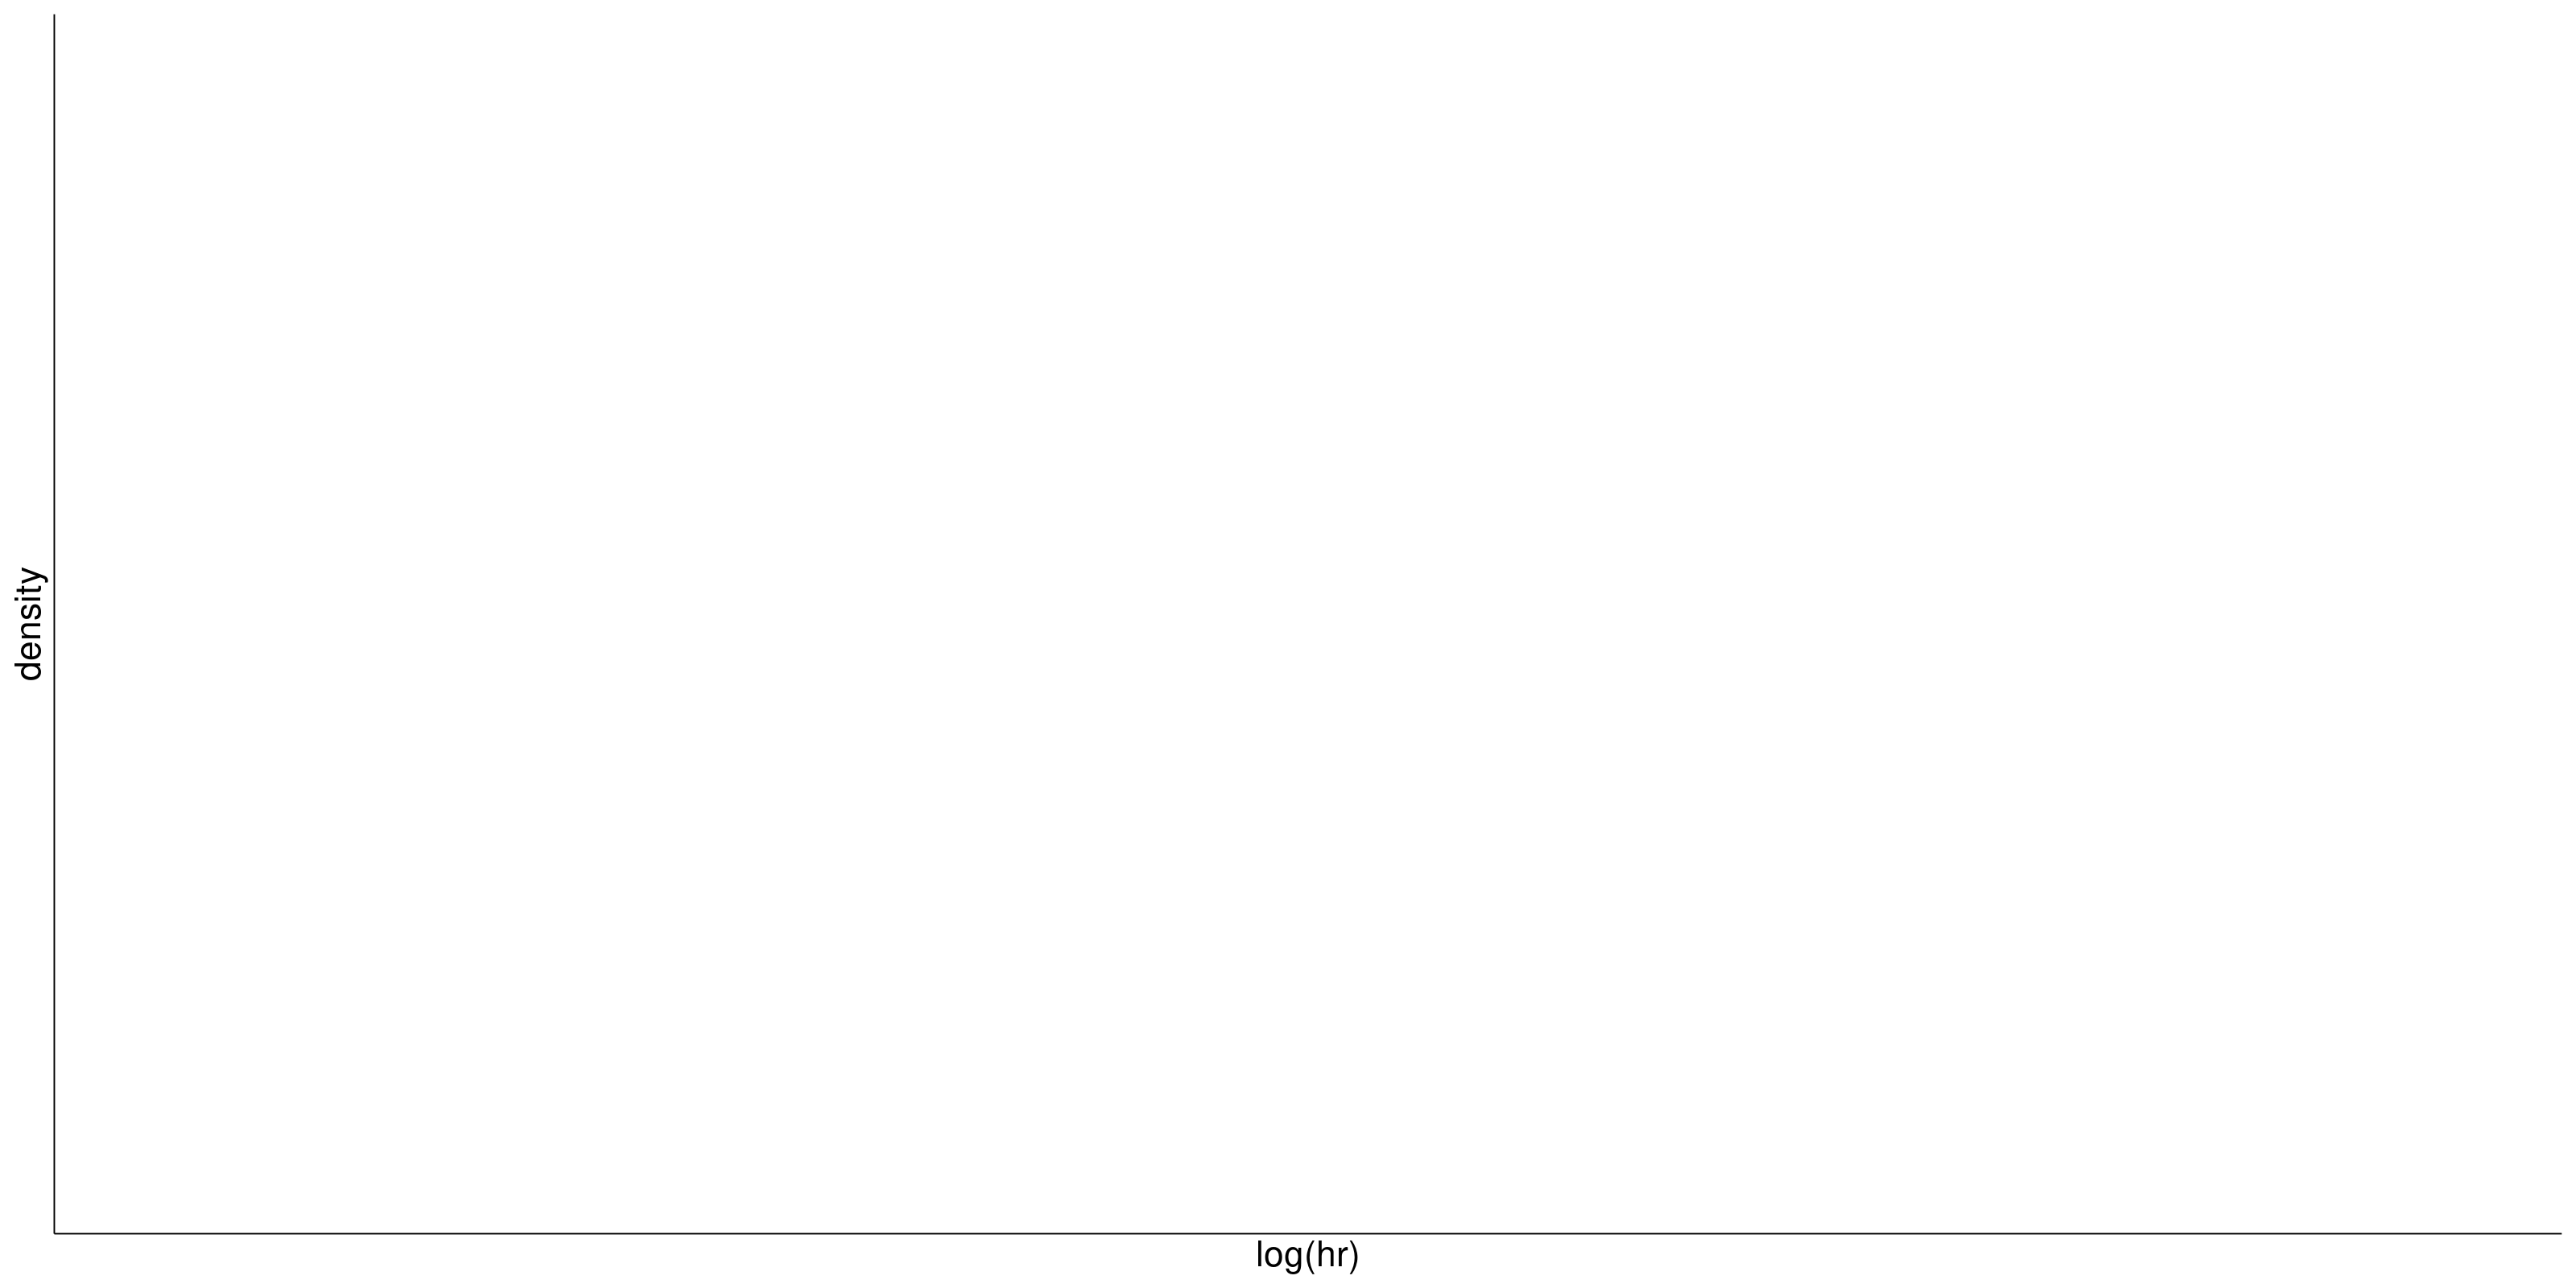

In [27]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

ggplot(temp_int_age, aes(x=log(hr))) + geom_density(fill="black", alpha=0.3)

In [28]:
temp_int_sex= temp_hrs %>% ungroup() %>%
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    filter(variable == "hrs_ret_sex")

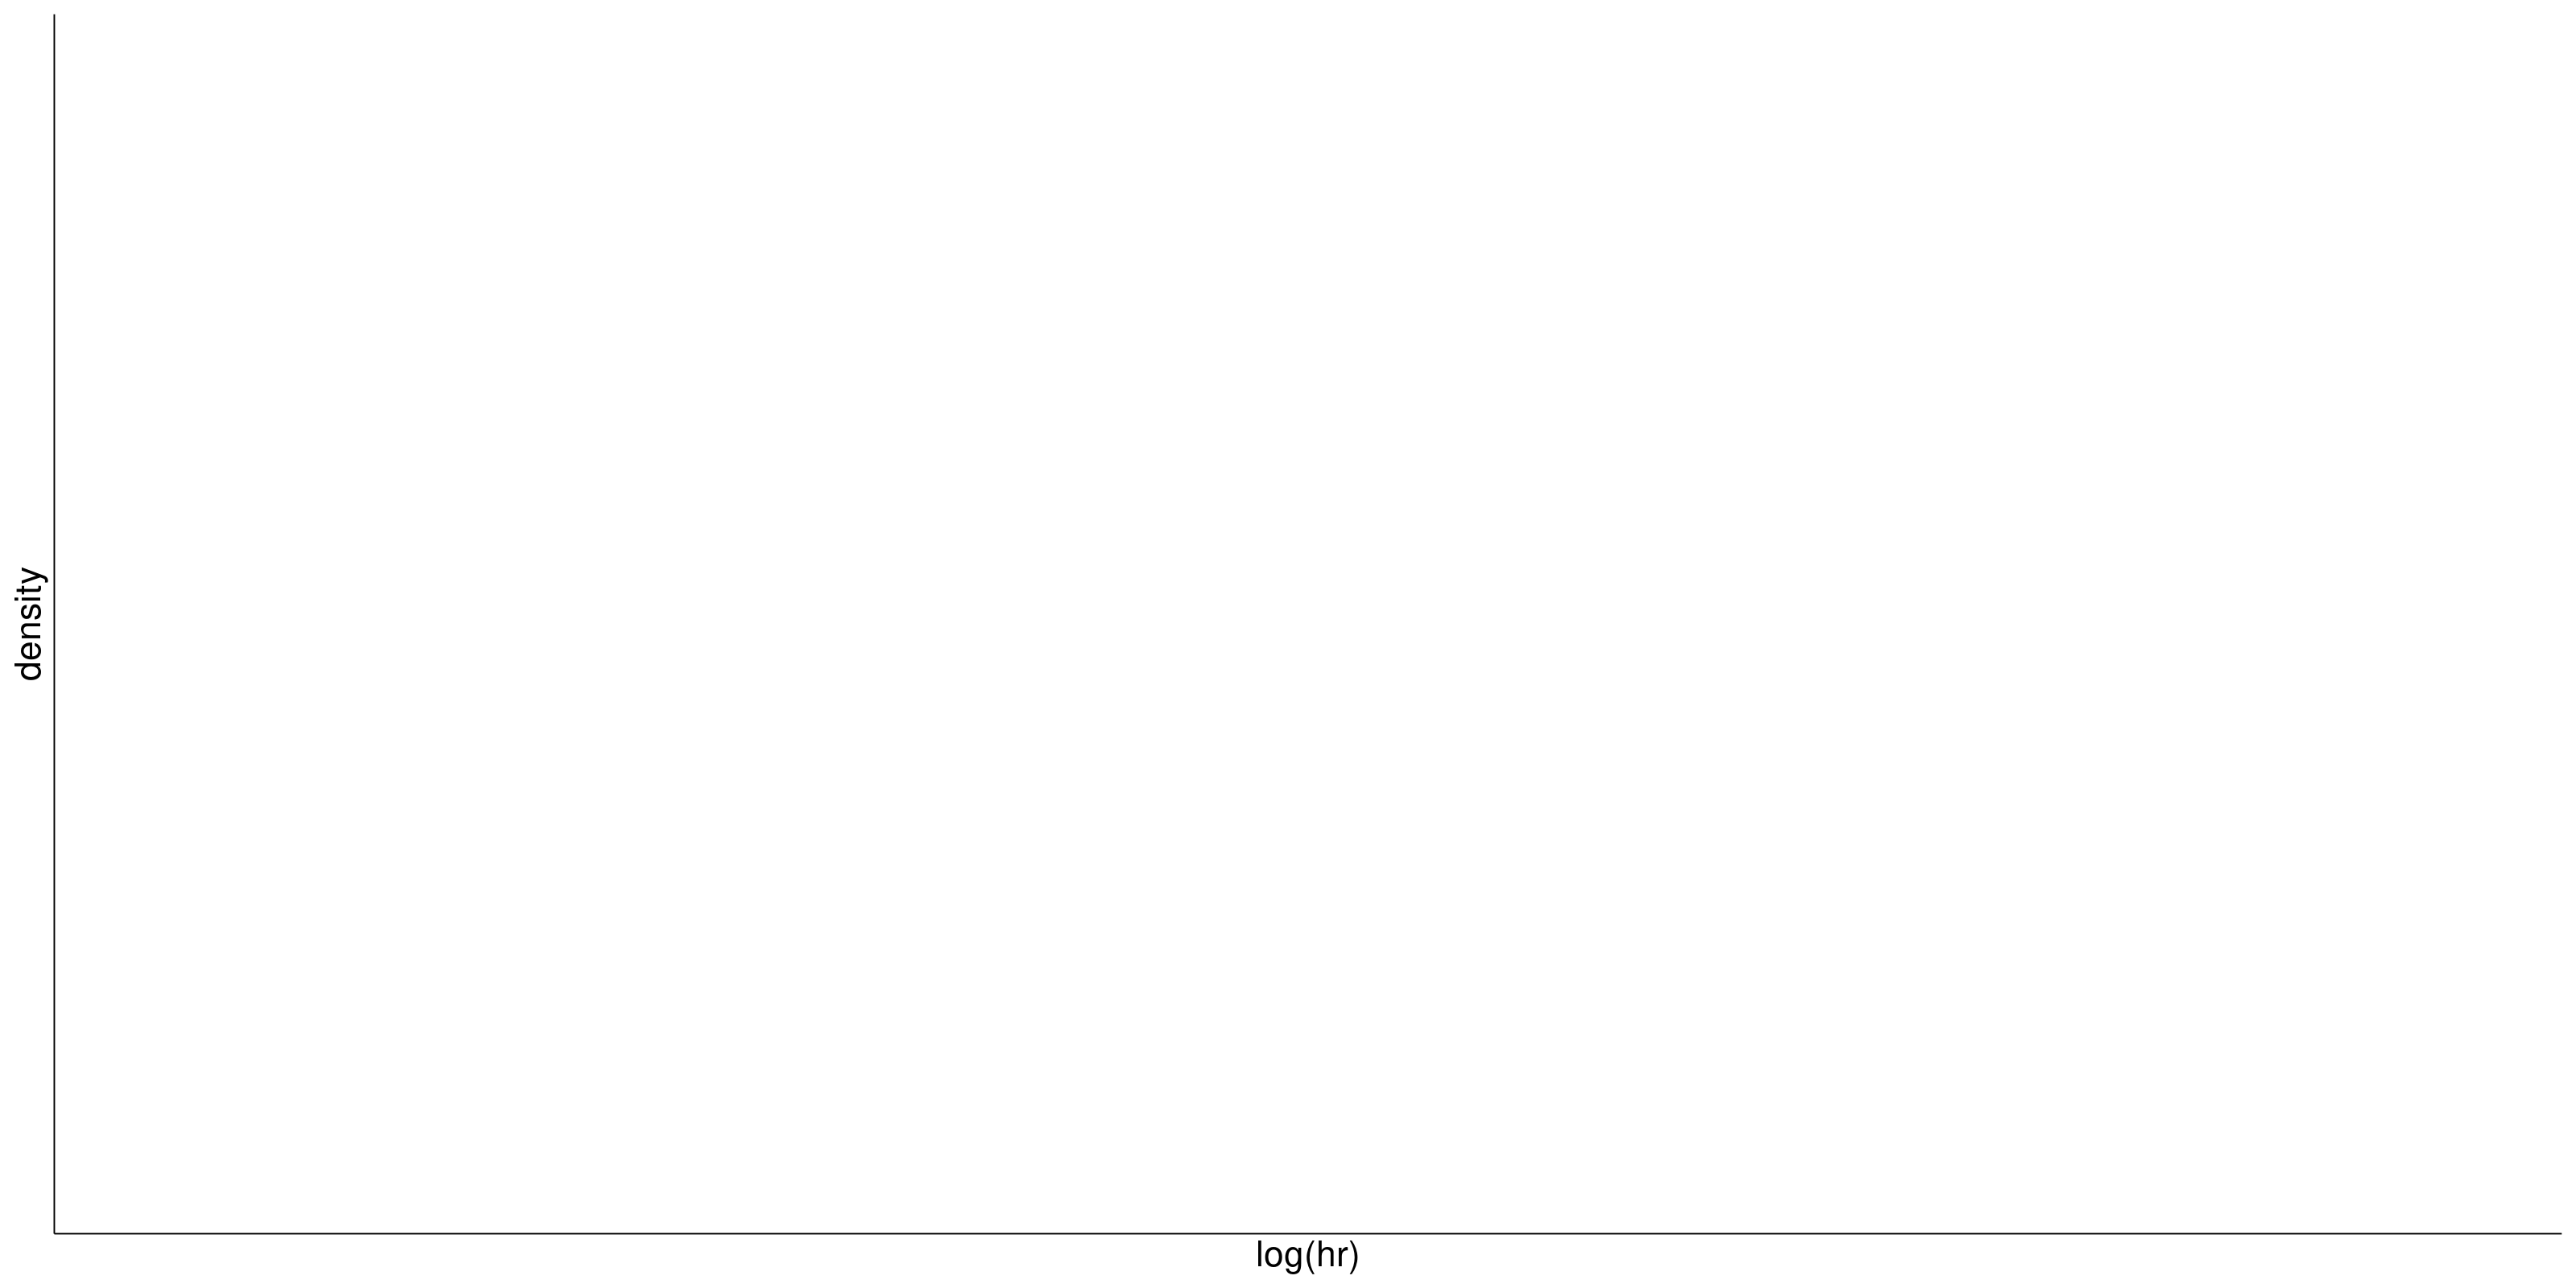

In [29]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

ggplot(temp_int_sex, aes(x=log(hr))) + geom_density(fill="black", alpha=0.3)

In [30]:
temp_hrs_int = temp_hrs %>% 
    filter(score %in% c("Age+Sex+Retina+I(Age*ret)")) %>%
    pivot_longer(all_of(c("hrs_ret", "hrs_ret_age", "hrs_ret_sex")), names_to="variable", values_to="hr") %>%
    group_by(endpoint, score, variable, phecode_string, phecode_category) %>% 
    median_qi(hr, na.rm=TRUE) %>% 
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_label = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, variable, phecode_string, phecode_category, HR_label) %>%
    pivot_wider(names_from="variable", values_from="HR_label") %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "hrs_ret", "hrs_ret_age", "hrs_ret_sex"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(endpoint) %>%
#mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup() %>%
    rename(HR_Retina = hrs_ret, `HR_Retina*Age`=hrs_ret_age, `HR_Retina*Sex`=hrs_ret_sex)
    
temp_hrs_int

ERROR: Error: Problem with `mutate()` column `hr`.
[34mℹ[39m `hr = round(hr, 2)`.
[31m✖[39m object 'hr' not found


In [31]:
temp_hrs_int %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category) %>% 

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: temp_hrs_int %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category) %>% 
   ^


In [32]:
temp_hrs_int %>% arrange(`HR_Retina*Age`)

ERROR: Error in arrange(., `HR_Retina*Age`): object 'temp_hrs_int' not found


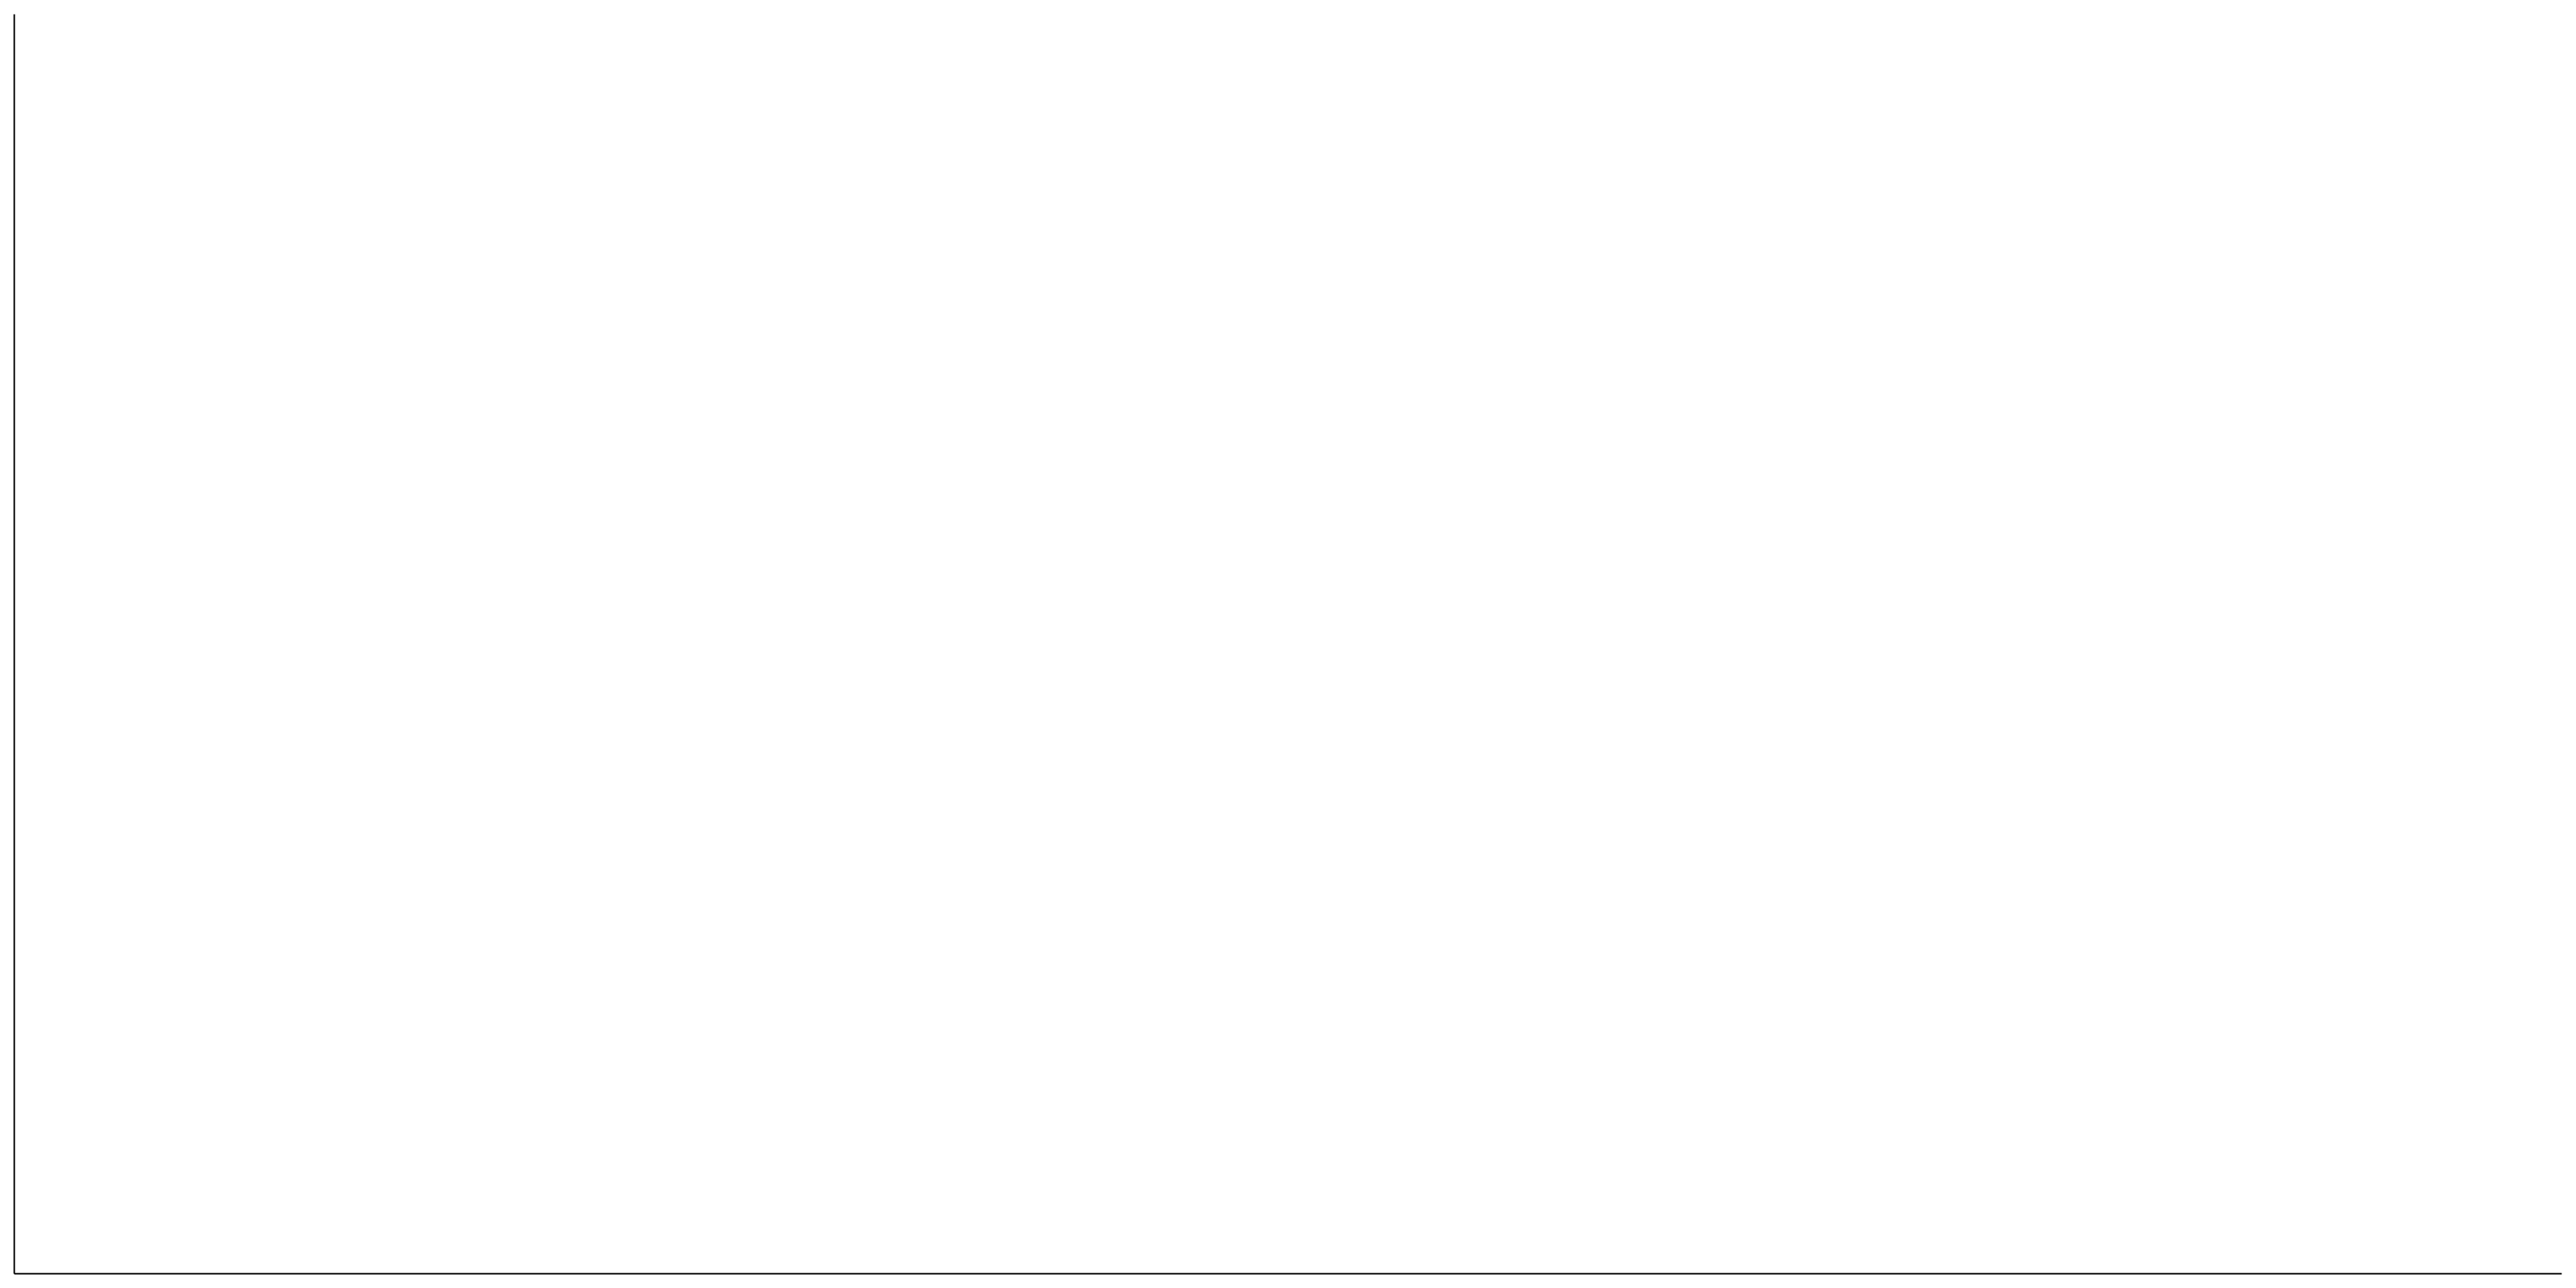

In [33]:
ggplot()

In [ ]:
temp_hrs_agg  %>% 
    write_csv("outputs/SupplTable2_HRsAll.csv")

In [ ]:
select(all_of(c("phecode_category", "endpoint", "phecode_string", "Retina", 'Age+Sex+Retina'))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(phecode_category, endpoint) %>%
%>% filter(endpoint %in% endpoint_selection)

In [ ]:
temp_hrs_agg

In [ ]:
temp_hrs_agg = temp_hrs %>% filter(endpoint %in% ep_sel) %>%
    group_by(endpoint, features) %>% median_qi(`exp(coef)`, na.rm=TRUE) %>% rename(hr = `exp(coef)`) %>%
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_Retina = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, features, HR_Retina) %>%
    pivot_wider(names_from="features", values_from="HR_Retina") %>% 
    select(all_of(c("endpoint", 'Age+Sex+Retina', 
                    #'SCORE2+Retina', 
                    'ASCVD+Retina', 
                   "PANEL+Retina"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% arrange(endpoint) %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup()
temp_hrs_agg

In [ ]:
fts_map = c(
    "Retina" = "MET",
    "COX_Age+Sex" = "AgeSex",
    "Age+Sex+Retina" = "AgeSex+MET",
    "COX_ASCVD" = "ASCVD",
    "ASCVD+Retina" = "ASCVD+MET",
    "COX_PANEL" = "PANEL", 
    "PANEL+Retina" = "PANEL+MET"
               )

In [ ]:
hr_labels = temp_hrs_agg %>% 
    pivot_longer(-endpoint, names_to="features", values_to="HR")
hr_labels

In [ ]:
temp_hr

In [ ]:
endpoints_sorted = (temp_hr %>% filter(score == "Age+Sex+Retina") %>% arrange(endpoint))$endpoint

In [ ]:
pcats_sorted = (temp_hr %>% arrange(endpoint) %>% distinct(phecode_category))$phecode_category

In [ ]:
temp_hr %>% arrange(desc(hr)) %>% filter(endpoint %in% endpoint_selection)

In [ ]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    filter(endpoint %in% endpoint_selection) %>%
    ggplot(aes(x=endpoint, y=hr, color=phecode_category)) + 
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=hr), color="black")+
    geom_point(size=1) + 
    geom_text(aes(y=hr+1, label=round(hr, 2)), size=2.5, hjust=-0)+
    geom_text(aes(y=hr+5, label=phecode_string), size=2.5, hjust=0)+
    coord_flip(ylim=c(0, 100)) + 
    facet_grid(rows=vars(phecode_category), scales="free_y", space="free_y")+
    theme(strip.text.y = element_text(angle=0))#+ facet_wrap(~phecode_category, scales="free_x")

In [ ]:
plot_width = 10; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    filter(endpoint %in% endpoint_selection) %>%
    ggplot(aes(x=endpoint, y=hr, color=phecode_category)) + 
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=hr), color="black")+
    geom_point(size=1) + 
    geom_text(aes(y=hr+1, label=round(hr, 2)), size=2.5, hjust=-0)+
    geom_text(aes(y=hr+5, label=phecode_string), size=2.5, hjust=0)+
    coord_flip(ylim=c(0, 100)) + 
    facet_grid(rows=vars(phecode_category), scales="free_y", space="free_y")#+ facet_wrap(~phecode_category, scales="free_x")

In [ ]:
plot_width = 10; plot_height=10; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    ggplot(aes(x=hr)) + geom_density(bw=1) + coord_cartesian(xlim=c(0, 20))

In [ ]:
endpoint_sample = (benchmark_endpoints %>% select(endpoint) %>% distinct() %>% sample_n(20))$endpoint

In [ ]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("AgeSex", "Retina", "Age+Sex+Retina")#, "AgeSexRetina")

temp = benchmark_endpoints %>% filter(score %in% scores_plot) %>% mutate(score = factor(score, levels=scores_plot)) %>% filter(endpoint %in% endpoint_sample)
temp %>% 
    ggplot(aes(x=score, y=cindex, fill=score, color=score)) + 
    geom_boxplot()+
    coord_flip()+
    #geom_violin(alpha=0.5) + 
    facet_wrap(~endpoint, labeller=labeller(endpoint=endpoint_map))